# Problem Set 7
## Juan Roa A15541981

### 1st block (imports)

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2nd block (loading data)

In [109]:
# loads dataset
COVID_df = pd.read_csv('worse_hospitalization_all_locs.csv')

In [110]:
# creates list of interesting / potentially useful features
features = ['date','location_name', 'deaths_data_type','deaths_mean',
            'totdea_mean','deaths_reported_mean','totdea_reported_mean',
            'total_tests_data_type', 'total_tests','confirmed_infections_data_type',
            'confirmed_infections','total_pop']

In [112]:
# Alters dataframe to include only select features and observations made in America
# Also resets the index of the dataframe
COVID_df = COVID_df[features]
COVID_df = COVID_df[COVID_df['location_name'] == 'United States of America']
COVID_df = COVID_df[COVID_df['deaths_data_type'] == 'observed']
COVID_df = COVID_df.reset_index()
COVID_df = COVID_df.drop(['index'], axis=1)

### 3rd block (showing first and last 5 of data)

In [113]:
COVID_df.head()

,date,location_name,deaths_data_type,deaths_mean,totdea_mean,deaths_reported_mean,totdea_reported_mean,total_tests_data_type,total_tests,confirmed_infections_data_type,confirmed_infections,total_pop
0,2020-02-04,United States of America,observed,0.0,-5.473591,0.0,-3.0,observed,0.004011,observed,0.0,3.279787e+08
1,2020-02-05,United States of America,observed,0.0,-5.473591,0.0,-3.0,observed,0.004952,observed,0.0,3.279787e+08
2,2020-02-06,United States of America,observed,0.0,-5.473591,0.0,-3.0,observed,0.005990,observed,0.0,3.279787e+08
3,2020-02-07,United States of America,observed,0.0,-5.473591,0.0,-3.0,observed,0.007130,observed,0.0,3.279787e+08
4,2020-02-08,United States of America,observed,0.0,-5.473591,0.0,-3.0,observed,0.008156,observed,0.0,3.279787e+08


In [114]:
COVID_df.tail()

,date,location_name,deaths_data_type,deaths_mean,totdea_mean,deaths_reported_mean,totdea_reported_mean,total_tests_data_type,total_tests,confirmed_infections_data_type,confirmed_infections,total_pop
449,2021-04-28,United States of America,observed,1356.858052,902263.059059,852.428571,572029.285714,NaN,NaN,observed,54351.0,3.279787e+08
450,2021-04-29,United States of America,observed,1271.066183,903534.125242,827.142857,572856.428571,NaN,NaN,observed,57468.0,3.279787e+08
451,2021-04-30,United States of America,observed,1091.771969,904625.897211,697.142857,573553.571429,NaN,NaN,observed,57489.0,3.279787e+08
452,2021-05-01,United States of America,observed,1117.019253,905742.916464,719.809524,574273.380952,NaN,NaN,observed,48648.5,3.279787e+08
453,2021-05-02,United States of America,observed,583.327338,906326.243802,369.809524,574643.190476,NaN,NaN,observed,35618.0,3.279787e+08


### 4th block (data visualizations)

In [115]:
# creates variables for features
mean_deaths = COVID_df['deaths_mean']
mean_tot_death = COVID_df['totdea_mean']
conf_infects = COVID_df['confirmed_infections']
date = COVID_df['date']

In [116]:
# creates list of features being used currently
features_list = [mean_deaths, mean_tot_death, conf_infects]

In [200]:
# creates list for the index of specific dates
x_dates_index = []

for i in date:
  # Pulls index of dates that are on the 4th of each month
  if i[-3:] == '-04':
    tester.append(pd.Index(date).get_loc(i))

print(x_dates_index)

[0, 29, 60, 90, 121, 151, 182, 213, 243, 274, 304, 335, 366, 394, 425]


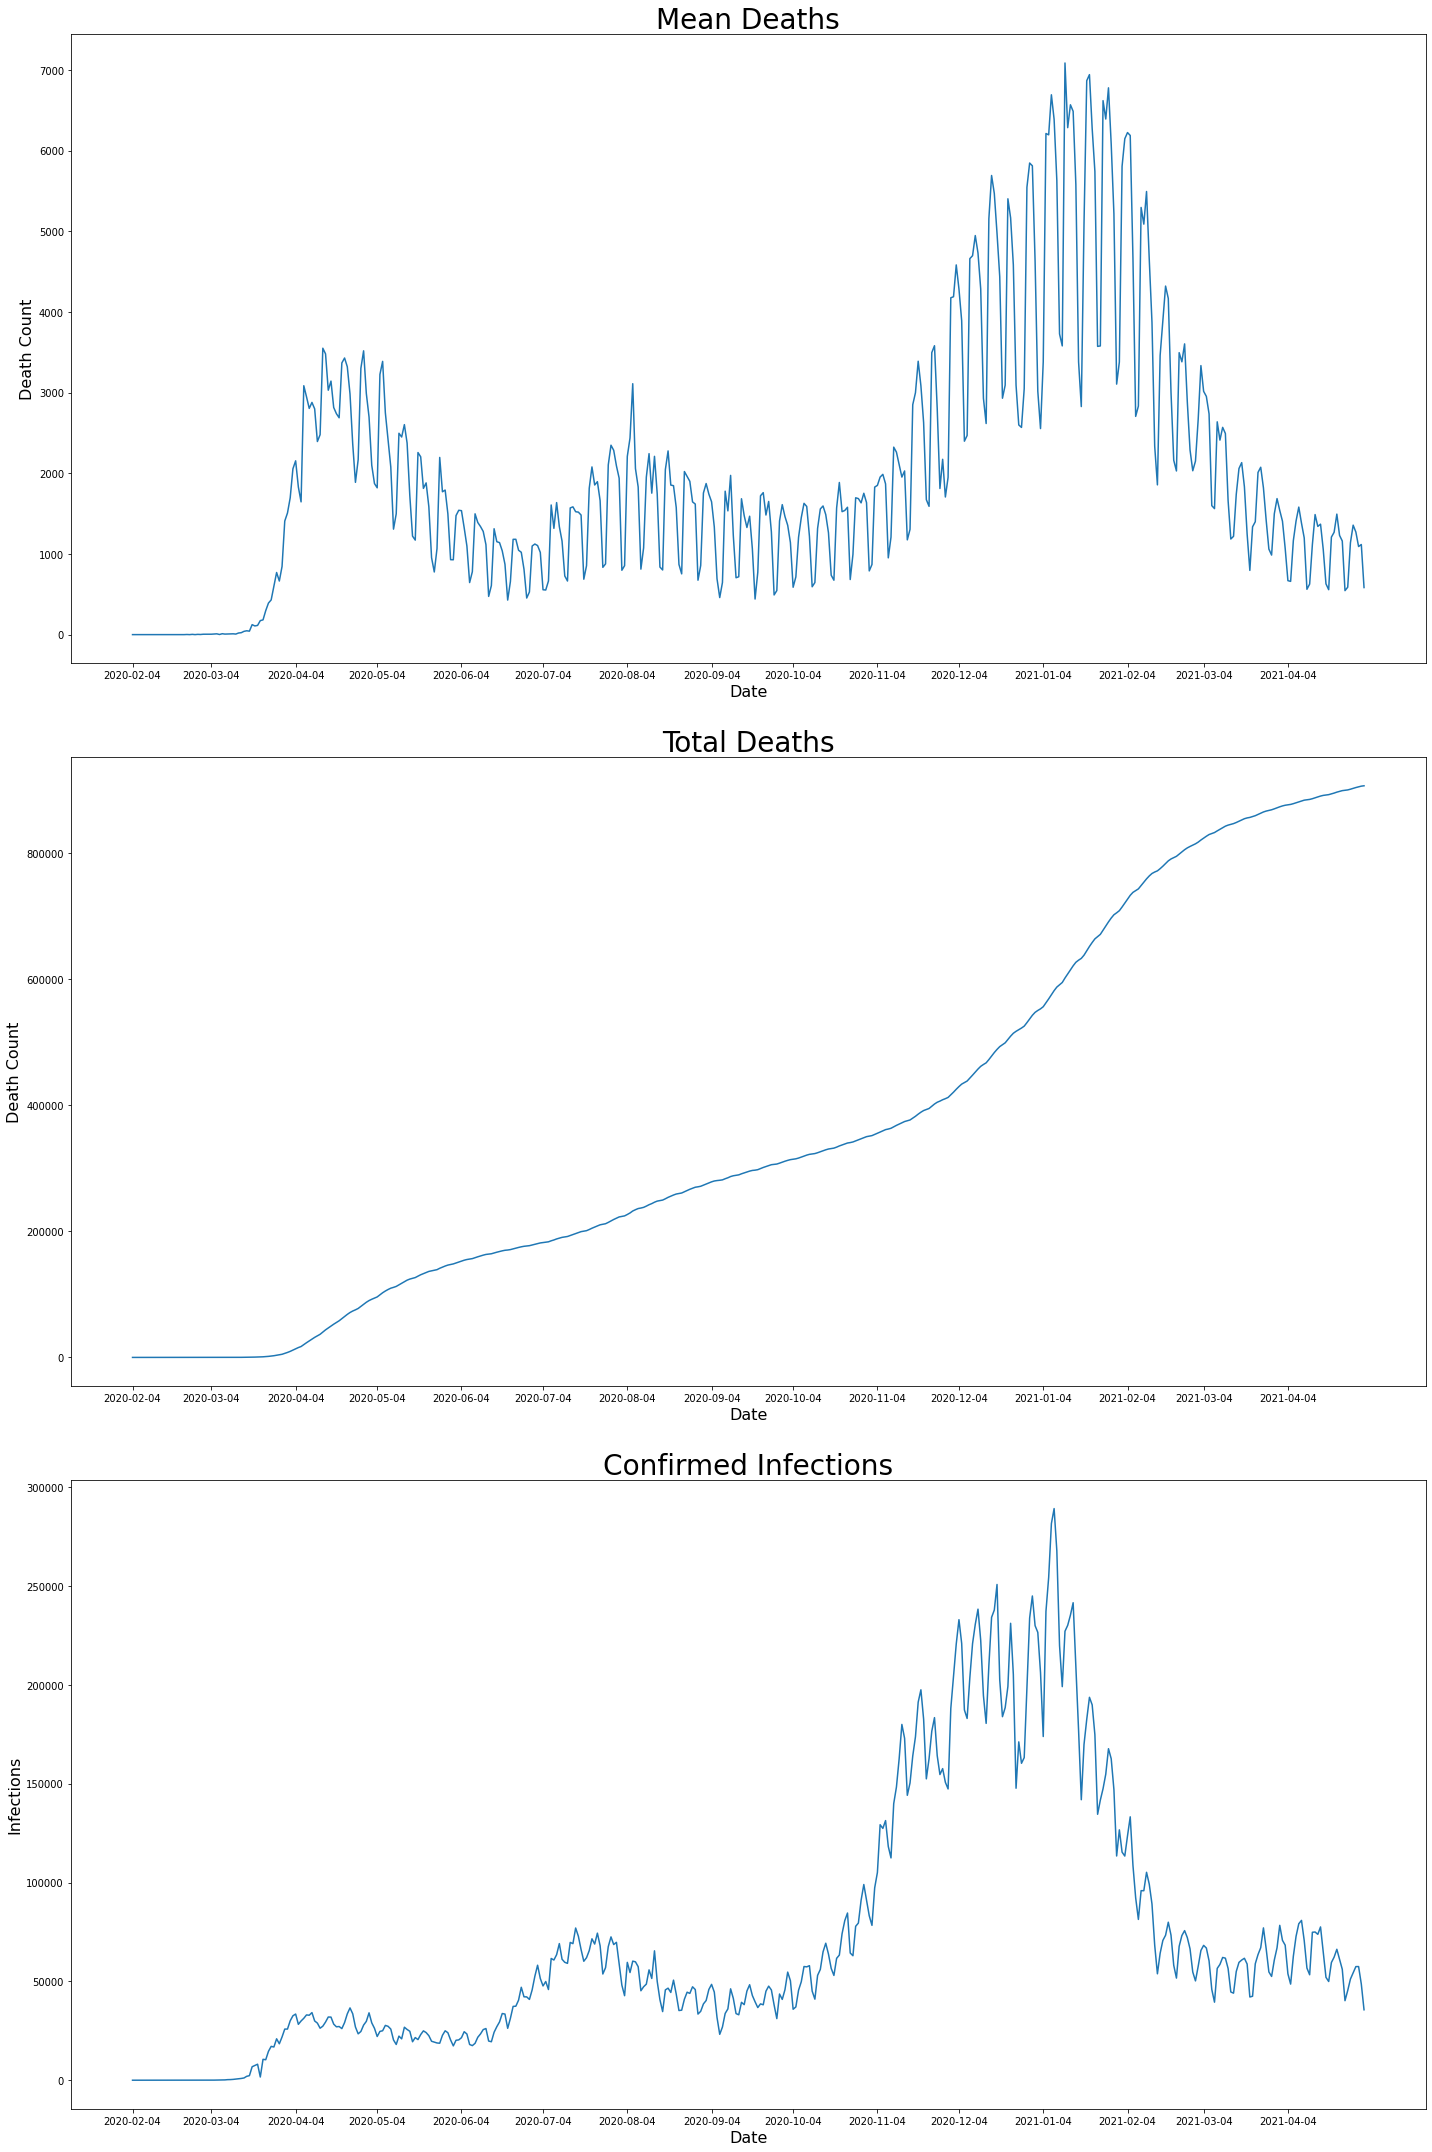

In [167]:
# creates 3 subplots
fig, axes = plt.subplots(3, 1, figsize=[20,30])

# plots mean death data
axes[0].plot(date, mean_deaths)
axes[0].set_title('Mean Deaths', fontsize=28)
axes[0].set_xticks(x_dates_index)
axes[0].set_xlabel('Date', fontsize=16)
axes[0].set_ylabel('Death Count', fontsize=16)

# plots total death data
axes[1].plot(date, mean_tot_death)
axes[1].set_title('Total Deaths', fontsize=28)
axes[1].set_xticks(x_dates_index)
axes[1].set_xlabel('Date', fontsize=16)
axes[1].set_ylabel('Death Count', fontsize=16)

# plots confirmed infection data
axes[2].plot(date, conf_infects)
axes[2].set_title('Confirmed Infections', fontsize=28)
axes[2].set_xticks(x_dates_index)
axes[2].set_xlabel('Date', fontsize=16)
axes[2].set_ylabel('Infections', fontsize=16)

plt.tight_layout(h_pad=3)

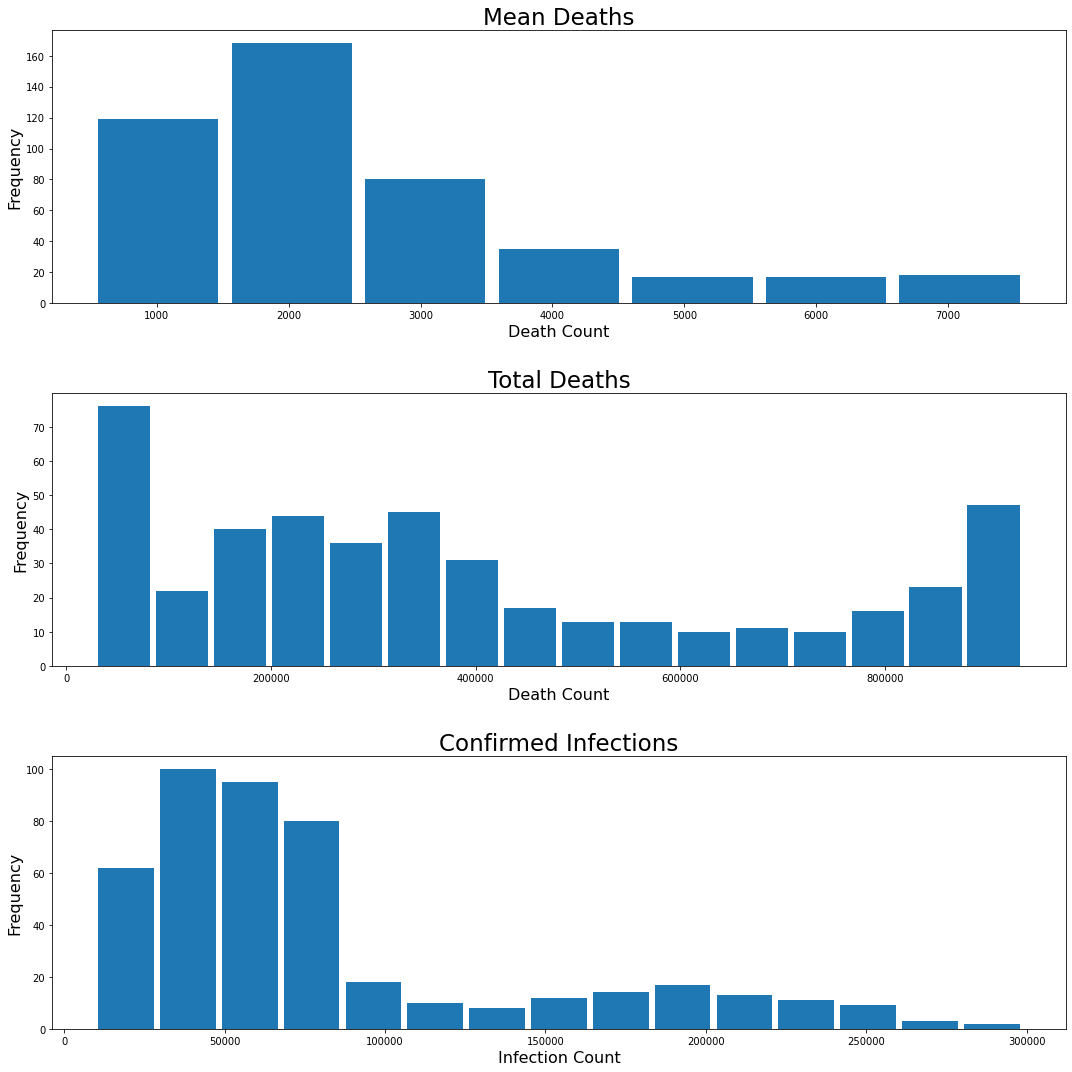

In [199]:
# creates 3 subplots
fig, axes = plt.subplots(3, 1, figsize=[15,15])

# graphs mean death data
axes[0].hist(mean_deaths, bins=7, rwidth=0.9, align='right')
axes[0].set_title('Mean Deaths', fontsize=23)
axes[0].set_xlabel('Death Count', fontsize=16)
axes[0].set_ylabel('Frequency', fontsize=16)

# graphs total death data
axes[1].hist(mean_tot_death, bins=16, rwidth=0.9, align='right')
axes[1].set_title('Total Deaths', fontsize=23)
axes[1].set_xlabel('Death Count', fontsize=16)
axes[1].set_ylabel('Frequency', fontsize=16)

# graphs confirmed infection data
axes[2].hist(conf_infects, bins=15, rwidth=0.9, align='right')
axes[2].set_title('Confirmed Infections', fontsize=23)
axes[2].set_xlabel('Infection Count', fontsize=16)
axes[2].set_ylabel('Frequency', fontsize=16)

plt.tight_layout(h_pad=3)

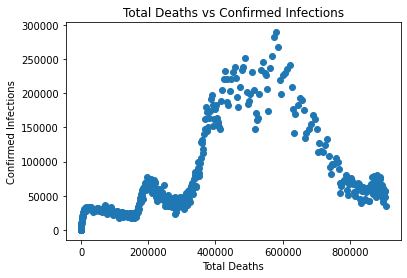

In [202]:
plt.scatter(mean_tot_death, conf_infects)
plt.title('Total Deaths vs Confirmed Infections')
plt.xlabel('Total Deaths')
plt.ylabel('Confirmed Infections')
plt.show()

### 5th block (feature engineering)


date                              False
location_name                     False
deaths_data_type                  False
deaths_mean                       False
totdea_mean                       False
deaths_reported_mean              False
totdea_reported_mean              False
total_tests_data_type              True
total_tests                        True
confirmed_infections_data_type    False
confirmed_infections              False
total_pop                         False
dtype: bool

AxesSubplot(0.125,0.125;0.62x0.755)


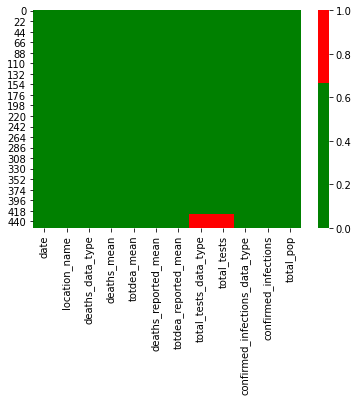

In [153]:
# Missing Data
print(COVID_df.isna().any())
print()
print(sns.heatmap(COVID_df.isnull(), cmap=['Green', 'Green', 'Red']))

In [150]:
# Shows duplicate date
print(COVID_df[COVID_df.duplicated()])

Empty DataFrame
Columns: [date, location_name, deaths_data_type, deaths_mean, totdea_mean, deaths_reported_mean, totdea_reported_mean, total_tests_data_type, total_tests, confirmed_infections_data_type, confirmed_infections, total_pop]
Index: []


### 6th block (what's next)

I will revise what features are necessary to keep when changing the dataframe. Currently, I have all features that I intially found interesting and potentially useful, however, after working through this problem set, I realized that there are some that can be left out and others that should be changed with a similar counterpart (there are features with smoother data for visualization which may be more visually appealing and I may want to represent the data per 100k rather than per 1 person).

I want to use simple linear regression to compare total infection rates to total deaths, mean death rates with infection rates. I may also have to look into if I should use the lower/upper certainty bounds for certain features to create better predictions about COVID deaths related to infection rates, etc.